# Assignment 1

First we need to import a few modules, execute the cell below:

In [ ]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    return np.cos(x);

You can use the following cell to check that your code works for scalar arguments:

In [ ]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [ ]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [11]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

def df_analytic(x):
    '''
    The analytic derivative
    '''
    return (-1)*numpy.sin(x);

In [ ]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [ ]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [12]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return (f(x)-f(x-dx))/dx;

In [ ]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


Text(0.5,1,'Difference between gradient calculated using backwards \n difference method and the actual gradient')

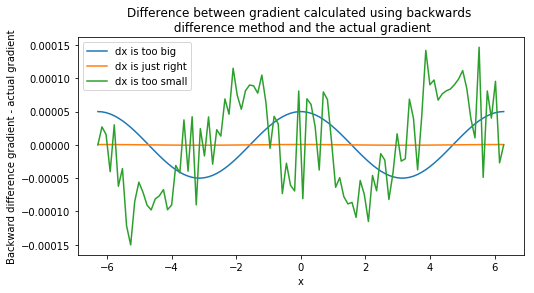

In [14]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)

plt.figure(figsize=(8, 4))
#plot too big
plt.plot(xs, df_dx_1 - df_dx_analytical)
#plot just right
plt.plot(xs, df_dx_2 - df_dx_analytical)
#plot too small
plt.plot(xs, df_dx_3 - df_dx_analytical)

#plotting legend
plt.gca().legend(('dx is too big','dx is just right','dx is too small'))

#axis labels and title
plt.xlabel("x")
plt.ylabel("Backward difference gradient - actual gradient")
plt.title("Difference between gradient calculated using backwards \n difference method and the actual gradient")

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


YOUR ANSWER HERE
Because the computer stores its data in binary (i.e. base 2), it means that the integer values are stored in the form $+-m$ x $2^e$. To visualise this imagine that the computer stored numbers in standard from to 3 decimal places. Let $x$ = 1.098 x 10^-12. If $dx$ = 0.1 x 10^-12, then $x$-$dx$=0.098 x 10^-12. This is not in standard form so it becomes 9.8### x 10^-14. As you can see, there are 3 decimal places that are unknown due to the rounding of the value when it was stored, meaning that the computer has to fill out the unknown decimal places (these values are determined in away that means they can't be right for all calculations). This explains the messy nature of the line on the graph representing "dx is too small."
    If dx is too big, it means that the two points used to form a line close to the gradient of the function f are too far apart, so that the line is no longer close to resembling the tangent of the cos function. This will therefore cause the calcualted gradient to become inaccurate.